In [1]:
import pandas as pd
import numpy as np
import re
import os
import random
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

In [2]:
#Import the Data Frame
Extracted_DF=pd.read_pickle('../Extracted_Information.dat')

In [3]:
#Fill NONEs with empty strings
Extracted_DF['Project_name'][Extracted_DF.Project_name.isnull()]=''
Extracted_DF['Project_desc'][Extracted_DF.Project_desc.isnull()]=''

In [4]:
#Import tools of nlp to clean our text.
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#long stopwords list (includes words as therein, thereof, however)
#Taken from https://www.ranks.nl/stopwords
long_stop_words=["a", "able", "about", "above", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "after", "afterwards", "again", "against", "ah", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", "at", "auth", "available", "away", "awfully", "b", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "between", "beyond", "biol", "both", "brief", "briefly", "but", "by", "c", "ca", "came", "can", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "could", "couldnt", "d", "date", "did", "didn't", "different", "do", "does", "doesn't", "doing", "done", "don't", "down", "downwards", "due", "during", "e", "each", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "et-al", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "few", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "for", "former", "formerly", "forth", "found", "four", "from", "further", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "had", "happens", "hardly", "has", "hasn't", "have", "haven't", "having", "he", "hed", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "hereupon", "hers", "herself", "hes", "hi", "hid", "him", "himself", "his", "hither", "home", "how", "howbeit", "however", "hundred", "i", "id", "ie", "if", "i'll", "im", "immediate", "immediately", "importance", "important", "in", "inc", "indeed", "index", "information", "instead", "into", "invention", "inward", "is", "isn't", "it", "itd", "it'll", "its", "itself", "i've", "j", "just", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "m", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "more", "moreover", "most", "mostly", "mr", "mrs", "much", "mug", "must", "my", "myself", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "now", "nowhere", "o", "obtain", "obtained", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "omitted", "on", "once", "one", "ones", "only", "onto", "or", "ord", "other", "others", "otherwise", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "owing", "own", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "re", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "s", "said", "same", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "she", "shed", "she'll", "shes", "should", "shouldn't", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "t", "take", "taken", "taking", "tell", "tends", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'll", "theyre", "they've", "think", "this", "those", "thou", "though", "thoughh", "thousand", "throug", "through", "throughout", "thru", "thus", "til", "tip", "to", "together", "too", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "very", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "was", "wasnt", "way", "we", "wed", "welcome", "we'll", "went", "were", "werent", "we've", "what", "whatever", "what'll", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "whose", "why", "widely", "willing", "wish", "with", "within", "without", "wont", "words", "world", "would", "wouldnt", "www", "x", "y", "yes", "yet", "you", "youd", "you'll", "your", "youre", "yours", "yourself", "yourselves", "you've", "z", "zero"]
all_stop_words=stop_words.union(long_stop_words)

#Import stemmer
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [5]:
#Create a function to extract the stem of the important words in a text
from nltk.tokenize import word_tokenize

import string
table_punctuation = str.maketrans('', '', string.punctuation)

def stem_text(text,stop_words=all_stop_words):
    #Lowercase
    text=text.lower()
    #Very often appear literals as (a), (b), (i), (vii), so we strip those
    text=re.sub('\(\s*[a-z]{,3}\s*\)','',text)
    #Separate into words
    tokens = word_tokenize(text)
    #Eliminate punctuation
    stripped = [w.translate(table_punctuation) for w in tokens]
    #Make sure all words are made of letters [a-z]
    words = [word for word in stripped if word.isalpha()]
    #Delete stop_words
    words = [w for w in words if not w in stop_words]
    #Get Stems
    stemmed = [porter.stem(word) for word in words]
    return ' '.join(stemmed)

In [6]:
#Extract the stem from project name and description of each PDF
Extracted_DF['Stemmed']=''
for i in Extracted_DF.index:
    name=Extracted_DF.Project_name[i]
    description=Extracted_DF.Project_desc[i]
    text=name+' '+description
    Extracted_DF.Stemmed[i]=stem_text(text)
#Extracted_DF.loc[Extracted_DF.Stemmed=='','Stemmed']=None

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
from sklearn.neighbors import KNeighborsClassifier

In [8]:
erase_max_words=25

n_samples = 2000
n_features = 1500
n_components = 10
n_top_words = 20
min_df=5
max_df=0.75

nmf_treshold=0.6
knn_treshold=0.6

In [9]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(Extracted_DF.Stemmed)

ind_common=list(np.argsort(np.array(X_counts.sum(axis=0))).ravel())
ind_common=ind_common[:-erase_max_words-1:-1]

#Most common words
extra_stop_words=[count_vect.get_feature_names()[i] for i in ind_common]
print('These are the ',erase_max_words,' most common stems: ', extra_stop_words)

These are the  25  most common stems:  ['project', 'object', 'borrow', 'descript', 'time', 'consist', 'improv', 'part', 'develop', 'subject', 'modif', 'bank', 'achiev', 'sector', 'agre', 'manag', 'assist', 'strengthen', 'servic', 'system', 'effici', 'support', 'institut', 'capac', 'program']


In [10]:
#Create a count matrix a weighted count matrix of the words, eliminating the above most common words. 
count_vect = CountVectorizer(stop_words=extra_stop_words, min_df=5, max_df=0.75,ngram_range=(1,2))
X_counts=count_vect.fit_transform(Extracted_DF.Stemmed)

#Words occurring in only 5 document or in at least 75% of the documents are removed.
tfidf_vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df,
                                   stop_words=extra_stop_words,max_features=n_features,norm='l2',ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform(Extracted_DF.Stemmed)


C:\Users\Francisco\Anaconda2\envs\Code Course\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Text(0, 0.5, 'Reconstruction Error')

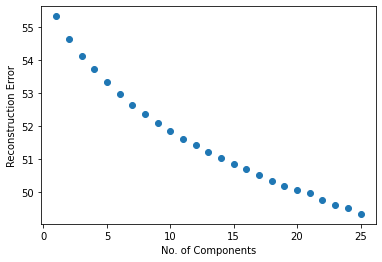

In [11]:
#How many components?
errors=[]
for n_components in range(1,26):
    nmf = NMF(random_state=444,alpha=.1, l1_ratio=.5,n_components=n_components,solver='mu')
    nmf.fit(X_tfidf)
    errors.append(nmf.reconstruction_err_)

plt.scatter(range(1,26),errors)
plt.xlabel('No. of Components')
plt.ylabel('Reconstruction Error')

In [59]:
#10 seems to be a good number
n_components=10

#Nonnegative Matrix Factorization to extract Sectors
nmf = NMF(random_state=444,alpha=.1, l1_ratio=.5,n_components=n_components)
X_projected=nmf.fit_transform(X_tfidf)

C:\Users\Francisco\Anaconda2\envs\Code Course\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [60]:
#Function to Plot the Topics Found
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(3, 5, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

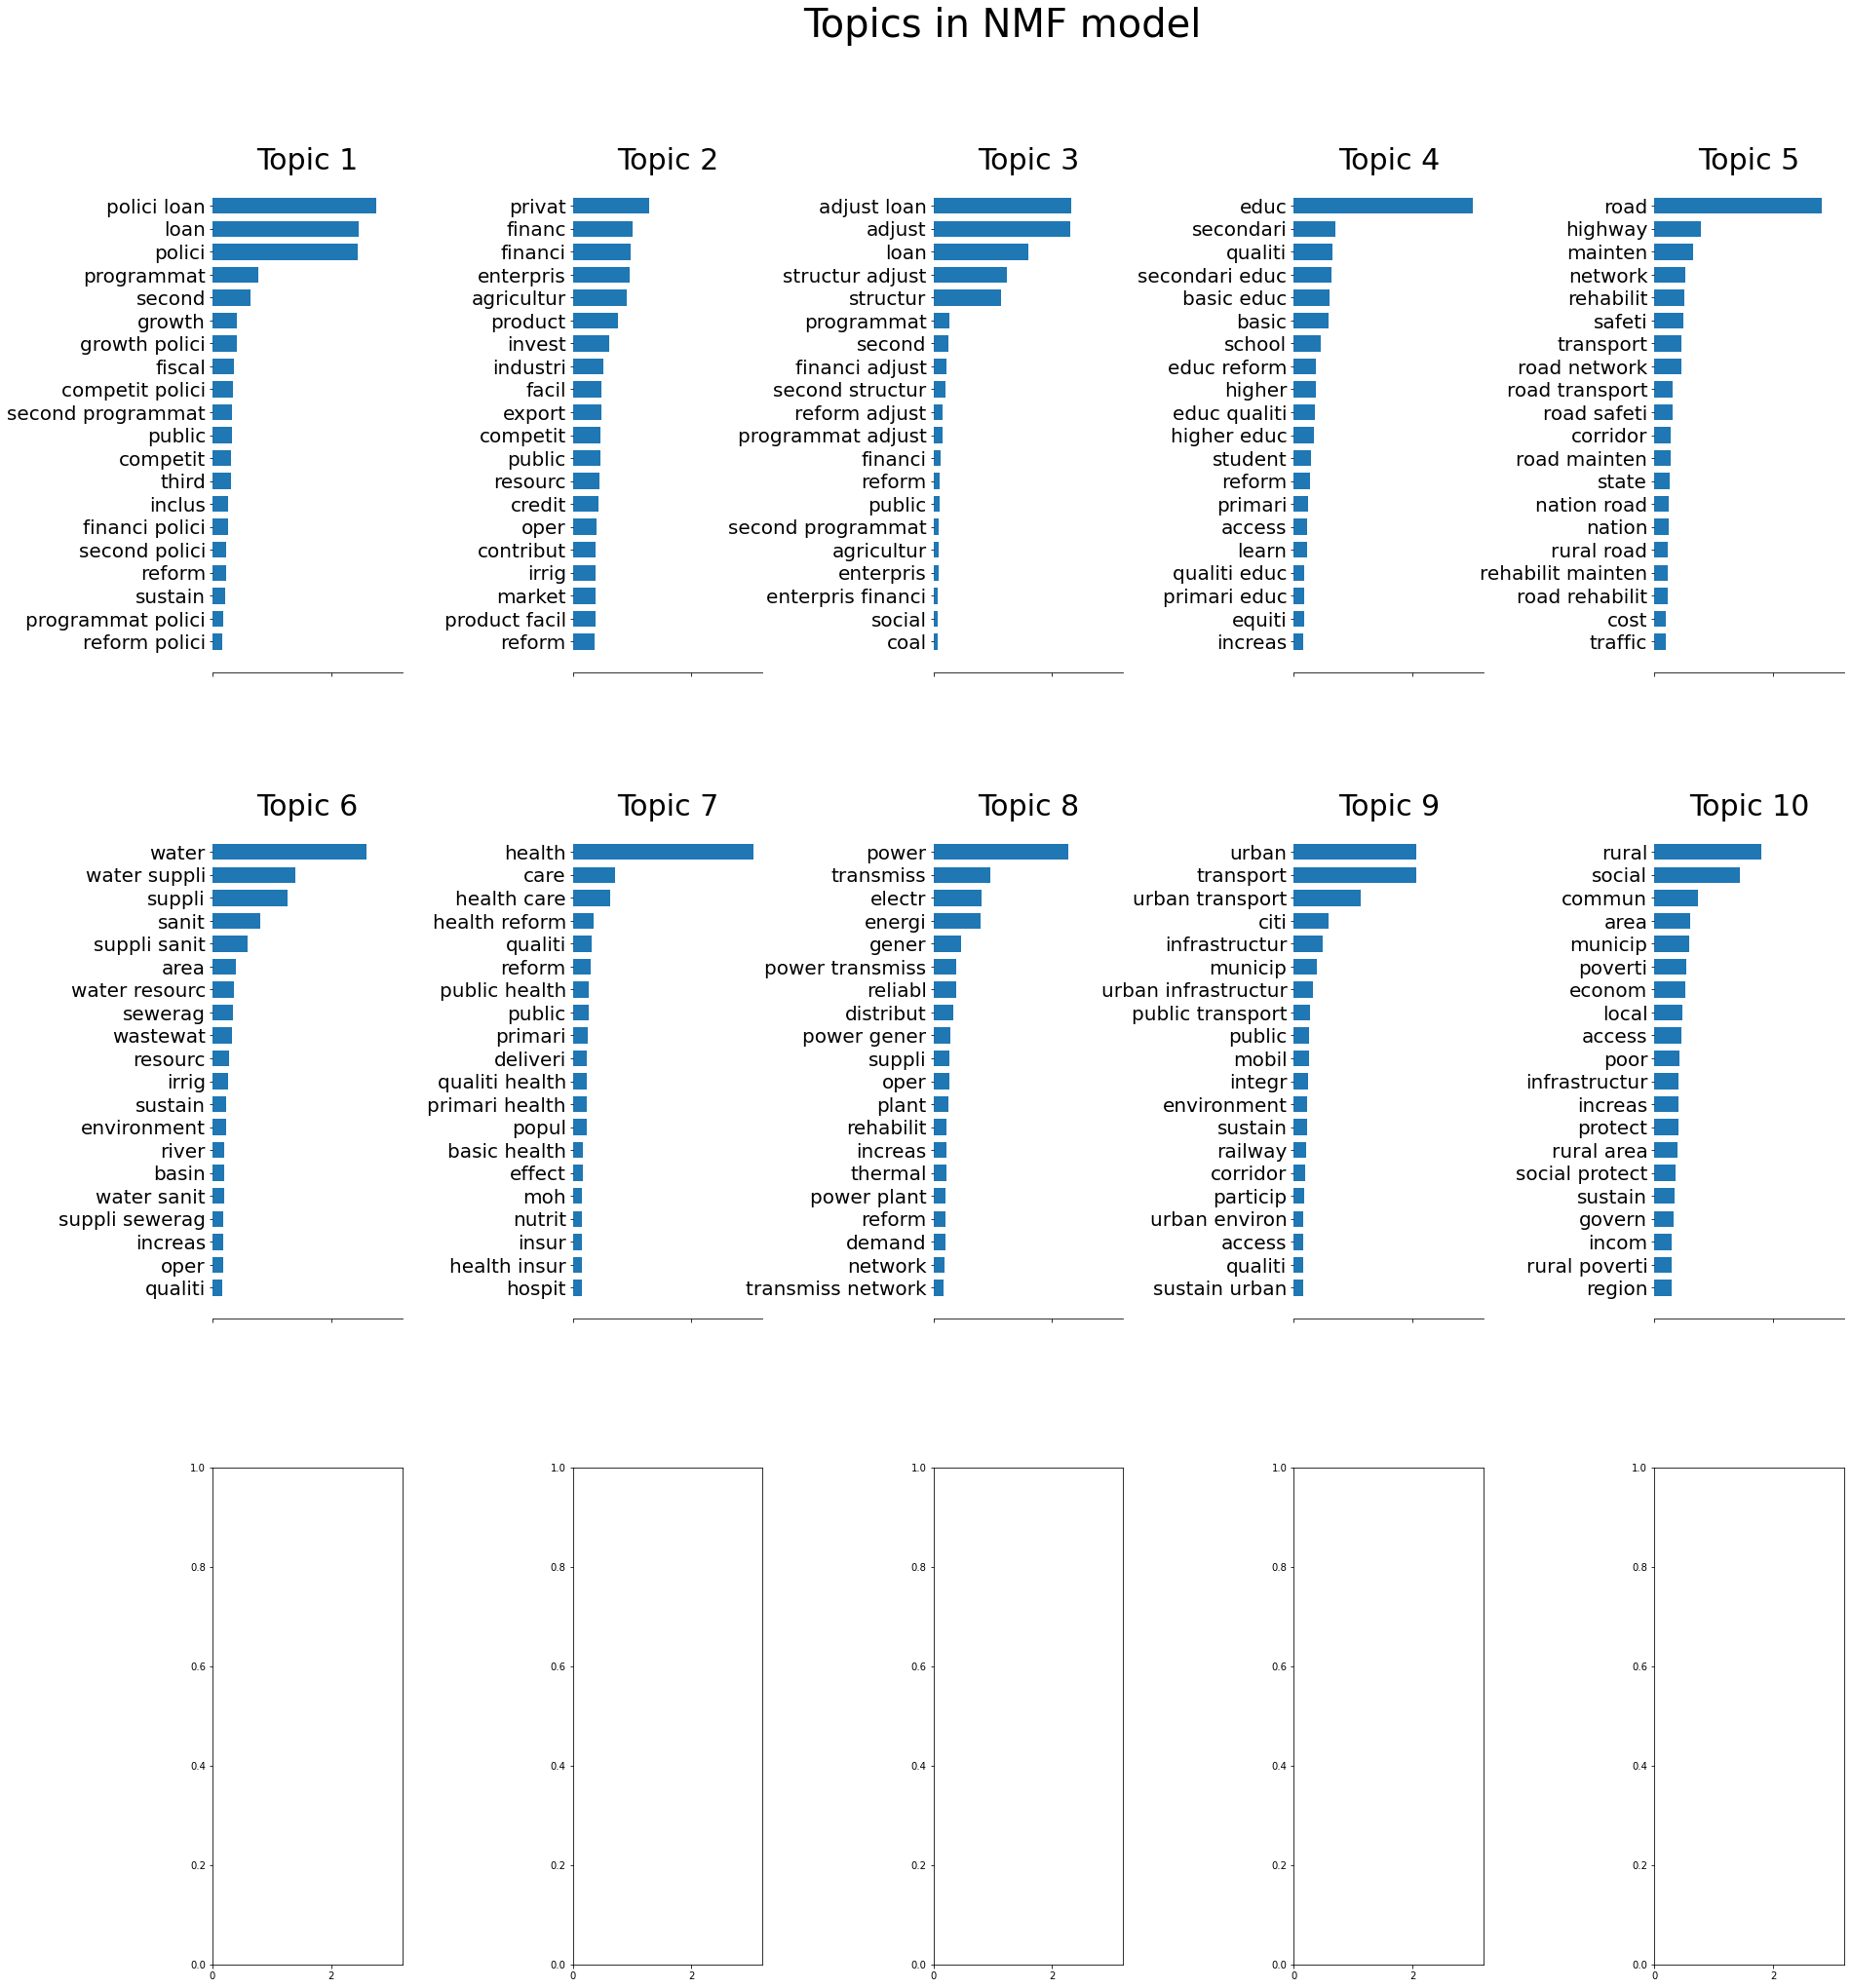

In [61]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,'Topics in NMF model')

In [62]:
#We now compute the coefficient of each PDF into this topics, and classify as that topic
#If the weight is more than the theshold
nmf_treshold=0.6
Extracted_DF['Topic_NMF']=X_projected.argmax(axis=1)+1
Extracted_DF['Topic']=X_projected.argmax(axis=1)+1
Extracted_DF['Score_NMF']=X_projected.max(axis=1)/X_projected.sum(axis=1)

#Extracted_DF.Topic.value_counts()

<ipython-input-62-1156d514becb>:6: RuntimeWarning: invalid value encountered in true_divide
  Extracted_DF['Score_NMF']=X_projected.max(axis=1)/X_projected.sum(axis=1)


In [63]:
#Update Topic
Extracted_DF['Topic']=(Extracted_DF.Topic*(Extracted_DF.Score_NMF>=nmf_treshold))

In [64]:
Extracted_DF[Extracted_DF.Topic==0].shape

(942, 11)

In [65]:
common_words_bigrams=[]
num_important_words=15
#Most common words in Topic 1
for i in range(n_components):
    count_vect = CountVectorizer(stop_words=extra_stop_words,ngram_range=(1,2))
    X_counts_topic = count_vect.fit_transform(Extracted_DF.Stemmed[Extracted_DF.Topic==i+1])

    ind_common=list(np.argsort(np.array(X_counts_topic.sum(axis=0))).ravel())
    ind_common=ind_common[:-num_important_words-1:-1]
    
    #Most common words
    common_topic=[count_vect.get_feature_names()[i] for i in ind_common]
    
    common_words_bigrams+=common_topic
    common_words_bigrams=list(np.unique(common_words_bigrams))

In [66]:
#Do it all again, but only using the most common words
count_vect = CountVectorizer(min_df=5, max_df=0.75,ngram_range=(1,2),vocabulary=common_words_bigrams)
X_counts=count_vect.fit_transform(Extracted_DF.Stemmed)

nmf = NMF(random_state=444,alpha=.1, l1_ratio=.5,n_components=n_components)
X_projected=nmf.fit_transform(X_counts)

C:\Users\Francisco\Anaconda2\envs\Code Course\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\Francisco\Anaconda2\envs\Code Course\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


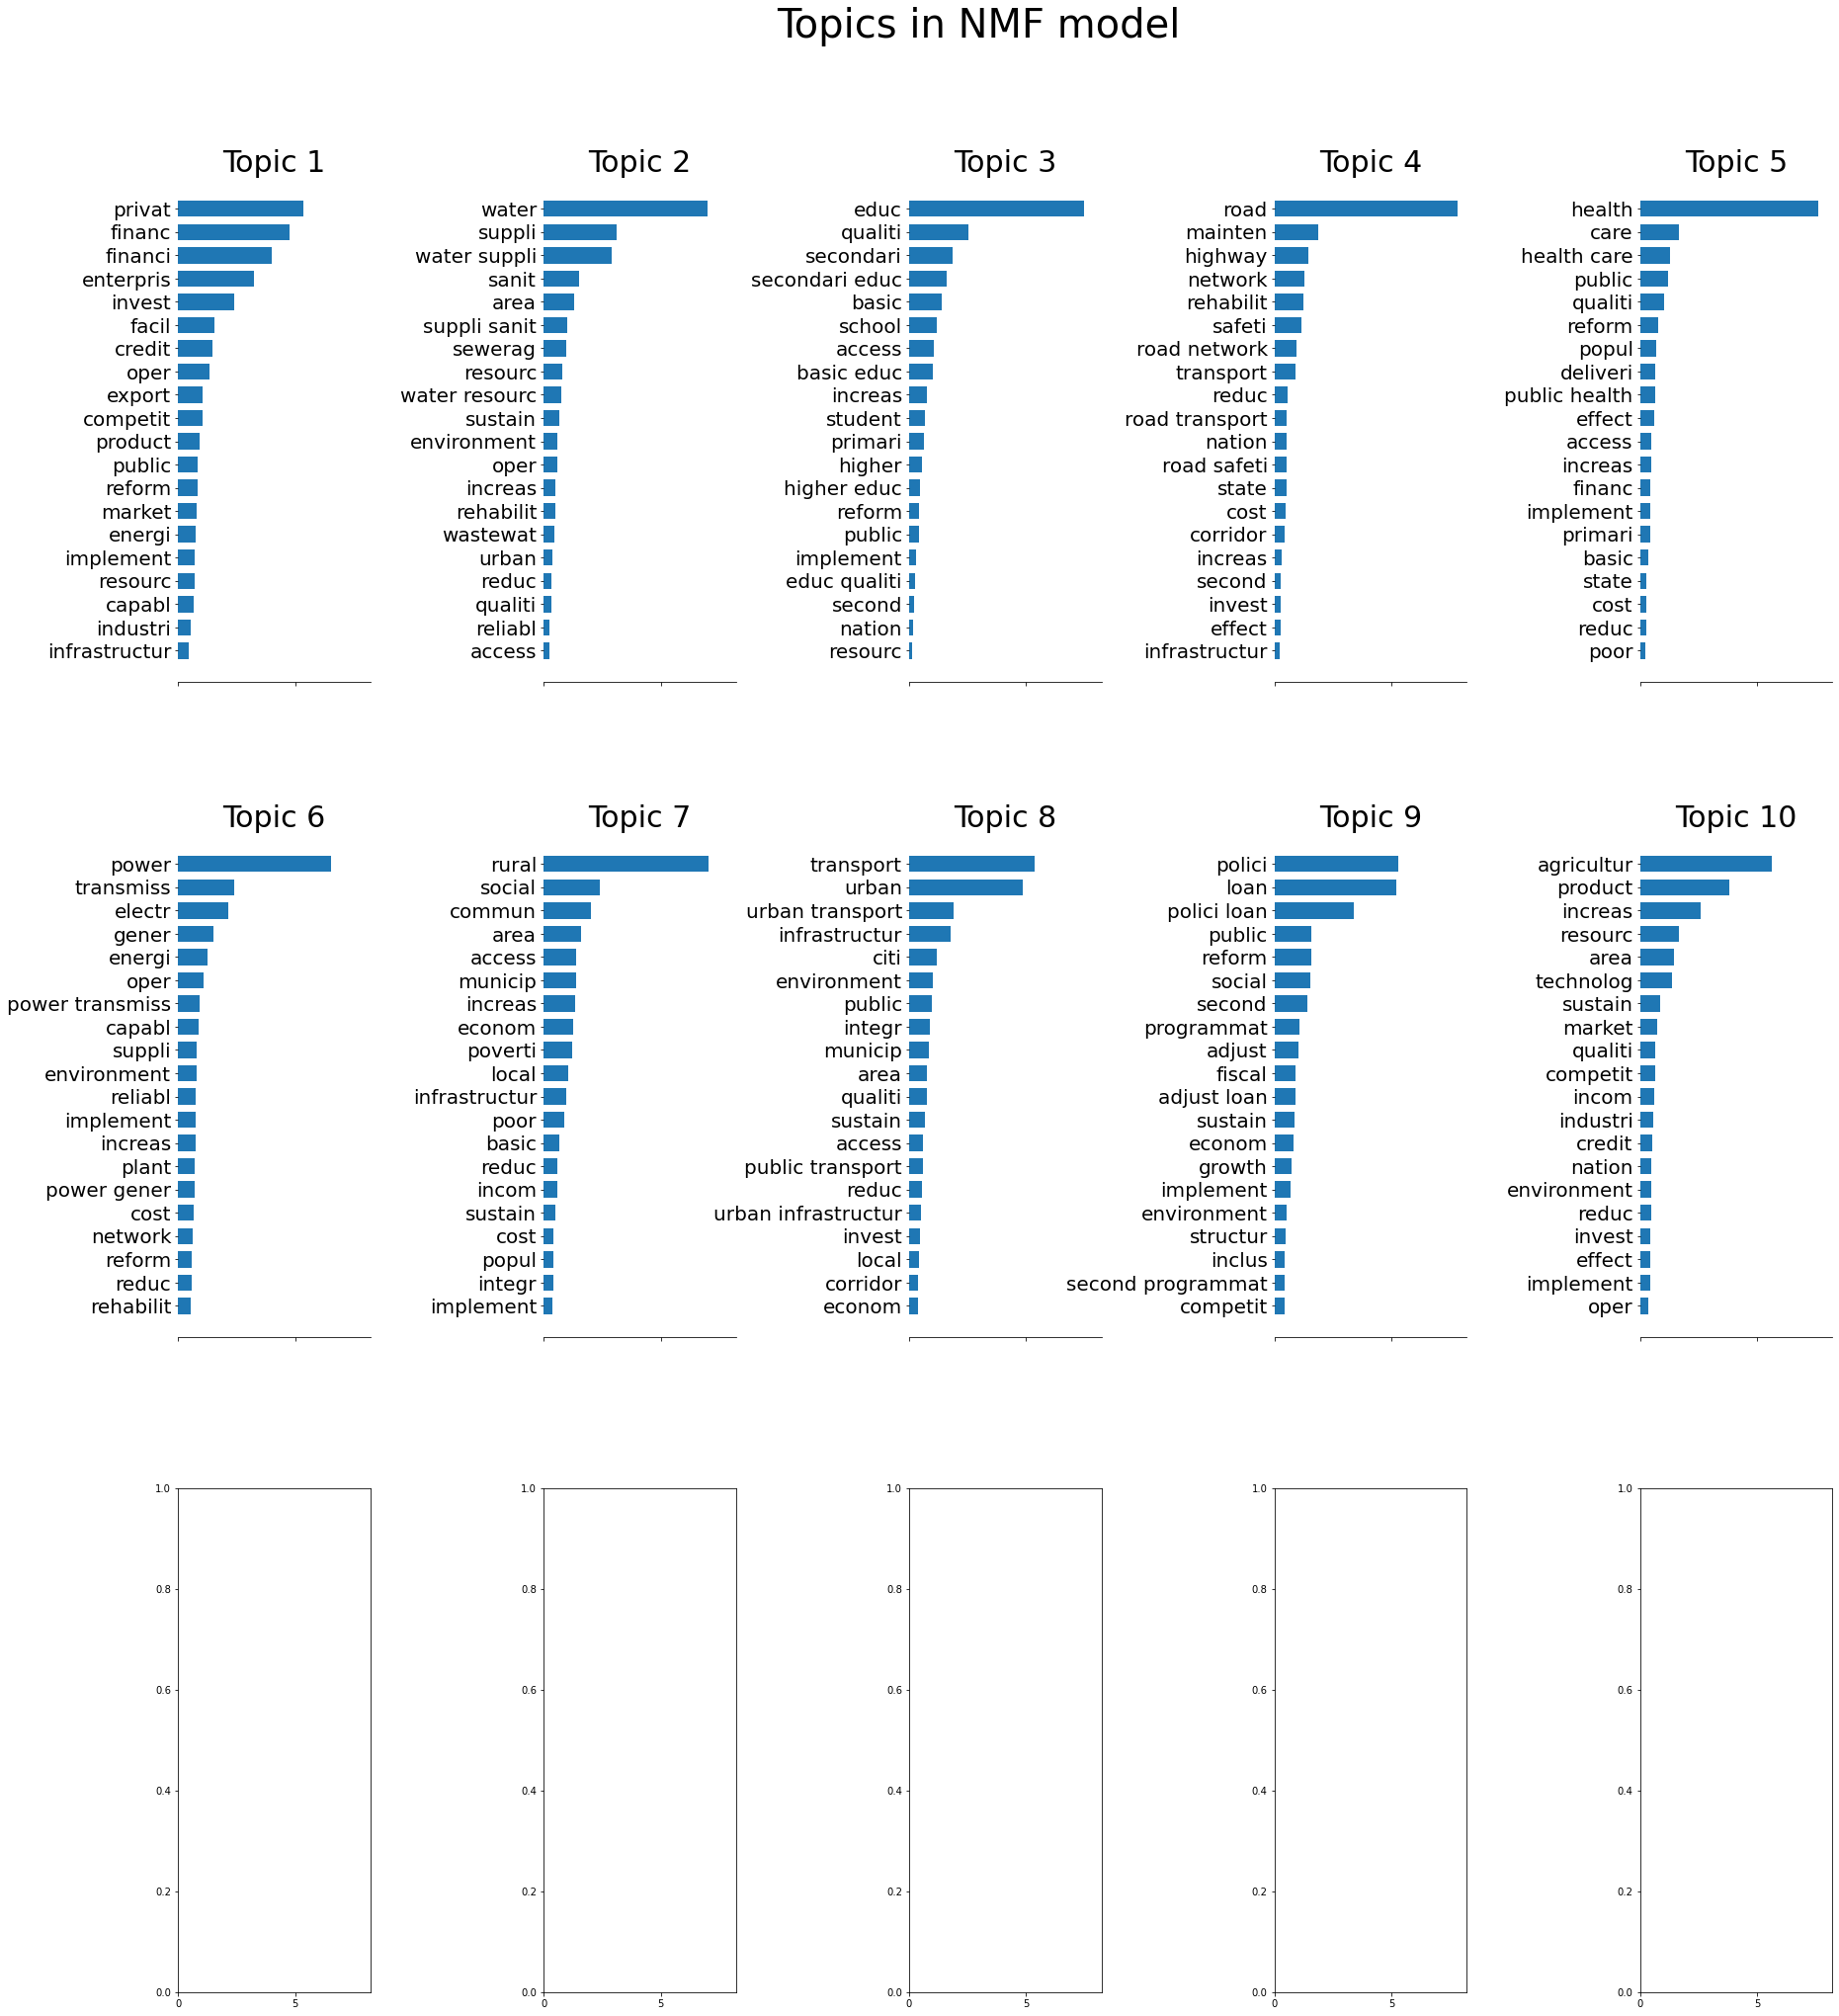

In [67]:
tfidf_feature_names=count_vect.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,'Topics in NMF model')

In [137]:
#We now compute the coefficient of each PDF into this topics, and classify as that topic
#If the weight is more than the theshold
nmf_treshold=0.5
Extracted_DF['Topic_NMF']=X_projected.argmax(axis=1)+1
Extracted_DF['Topic']=X_projected.argmax(axis=1)+1
Extracted_DF['Score_NMF']=X_projected.max(axis=1)/X_projected.sum(axis=1)

#Update Topic
Extracted_DF['Topic']=(Extracted_DF.Topic*(Extracted_DF.Score_NMF>=nmf_treshold))

<ipython-input-137-e9f0850b4793>:6: RuntimeWarning: invalid value encountered in true_divide
  Extracted_DF['Score_NMF']=X_projected.max(axis=1)/X_projected.sum(axis=1)


In [138]:
Extracted_DF.Topic.value_counts()

0     965
9     509
1     256
8     218
2     202
10    191
7     188
4     186
3     177
6     174
5     139
Name: Topic, dtype: int64

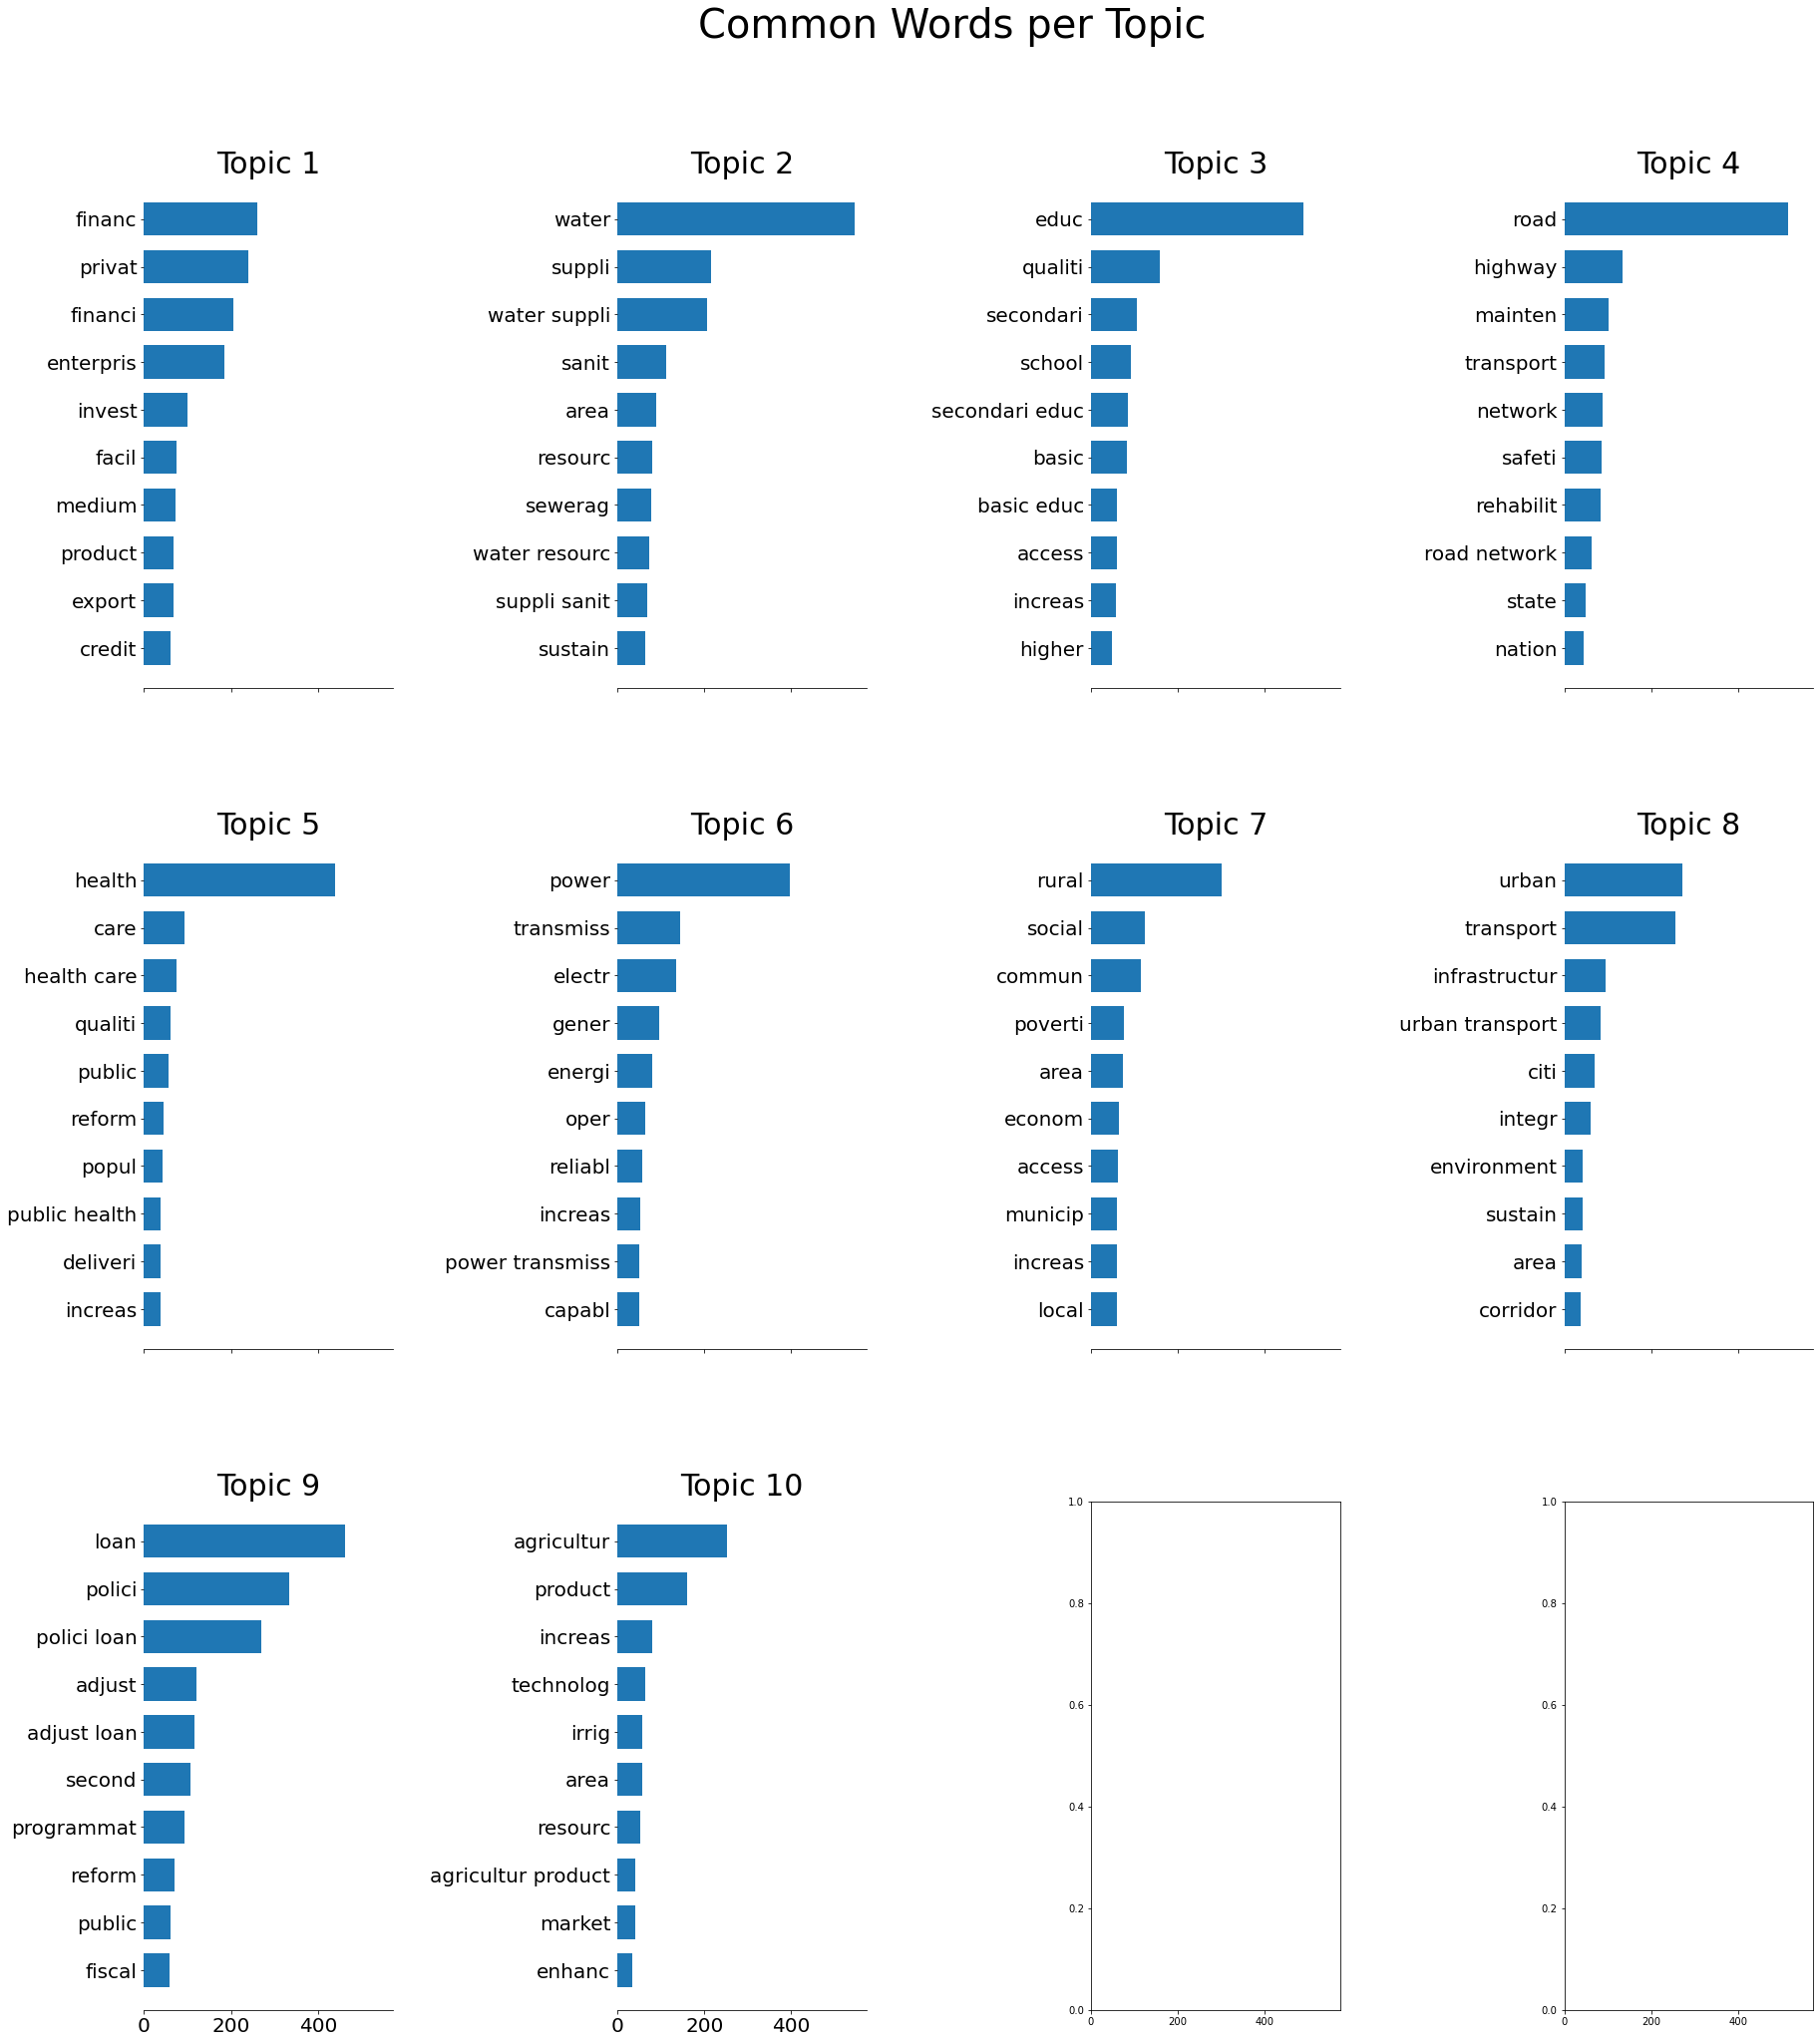

In [139]:
#Plot Common words per Topic
fig, axes = plt.subplots(3, 4, figsize=(30, 30), sharex=True)
axes = axes.flatten()
for i in range(n_components):
    count_vect = CountVectorizer(stop_words=extra_stop_words,ngram_range=(1,2))
    X_counts_topic = count_vect.fit_transform(Extracted_DF.Stemmed[Extracted_DF.Topic==i+1])
    
    total_count=np.array(X_counts_topic.sum(axis=0)).ravel()
    ind_common=list(np.argsort(total_count))
    ind_common=ind_common[:-11:-1]
    
    #Most common words
    top_features=[count_vect.get_feature_names()[k] for k in ind_common]
    weights=[total_count[k] for k in ind_common]

    ax = axes[i]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'Topic {i +1}',
                 fontdict={'fontsize': 30})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=20)
    for i in 'top right left'.split():
        ax.spines[i].set_visible(False)
    fig.suptitle('Common Words per Topic', fontsize=40)

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.show()

In [140]:
#We now give representative names to the Topics
Topics_Dict={0:'Other', 1:'Private Sector Development', 2:'Water Works', 3:'Education', 4:'Road Infrastructure', 5:'Health care', 6: 'Energy and Grid', 7:'Rural Development', 8:'Urban Development', 9:'Financial Sector', 10:'Agriculture' }

In [141]:
Extracted_DF=Extracted_DF.replace({'Topic':Topics_Dict})